##  Retreive FHIR Step Count Observations and calculate the daily, weekly and monthly step counts

1. Load step count data as FHIR Observations from OMH Shimmer FitBit data.
1. Convert FHIR Search Bundle to a Panda Dataframe
1. sum values by day, week, and month and create a graph


In [1]:
from pathlib import Path 
from json import dumps,loads
from pandas import *
from pandas.io.json import json_normalize
from IPython.display import display as Display,HTML

### First lets get a bunch of FHIR Observation data as a FHIR Search Bundle
 - For starters Just download data from SHIMMER App

In [4]:
my_path = Path("observation-step-count.json")
obs_stepcounts_json=my_path.read_text()
obs_stepcounts=loads(obs_stepcounts_json)
obs_stepcounts

{'resourceType': 'Bundle',
 'type': 'searchset',
 'total': 10202,
 'entry': [{'resource': {'resourceType': 'Observation',
    'meta': {'profile': ['http://www.fhir.org/mfhir/StructureDefinition/omh_fhir_profile_quantitative_observation']},
    'identifier': [{'system': 'https://omh.org/shimmer/ids',
      'value': '620570d7-91c6-4306-bfc9-df0a5b9d00e2'}],
    'status': 'unknown',
    'category': [{'coding': [{'system': 'http://hl7.org/fhir/observation-category',
        'code': 'physical-activity',
        'display': 'Physical Activity'}]}],
    'code': {'coding': [{'system': 'http://loinc.org',
       'code': '55423-8',
       'display': 'Number of steps in unspecified time.'}]},
    'subject': {'identifier': {'system': 'https://omh.org/shimmer/patient_ids'}},
    'effectivePeriod': {'start': '2020-01-19T00:51:43.354684375Z',
     'end': '2020-01-19T00:52:43.354684375Z'},
    'issued': '2020-03-19T18:13:41.424Z',
    'valueQuantity': {'value': 7,
     'unit': 'steps',
     'system': '

### Flatten and create dataframe: for each entry in Bundle create a record

In [5]:
df = json_normalize(obs_stepcounts, record_path = ['entry'])
df.head()

,resource.resourceType,resource.meta.profile,resource.identifier,resource.status,resource.category,resource.code.coding,resource.subject.identifier.system,resource.effectivePeriod.start,resource.effectivePeriod.end,resource.issued,resource.valueQuantity.value,resource.valueQuantity.unit,resource.valueQuantity.system,resource.valueQuantity.code
0,Observation,[http://www.fhir.org/mfhir/StructureDefinition...,"[{'system': 'https://omh.org/shimmer/ids', 'va...",unknown,[{'coding': [{'system': 'http://hl7.org/fhir/o...,"[{'system': 'http://loinc.org', 'code': '55423...",https://omh.org/shimmer/patient_ids,2020-01-19T00:51:43.354684375Z,2020-01-19T00:52:43.354684375Z,2020-03-19T18:13:41.424Z,7,steps,http://unitsofmeasure.org,{steps}
1,Observation,[http://www.fhir.org/mfhir/StructureDefinition...,"[{'system': 'https://omh.org/shimmer/ids', 'va...",unknown,[{'coding': [{'system': 'http://hl7.org/fhir/o...,"[{'system': 'http://loinc.org', 'code': '55423...",https://omh.org/shimmer/patient_ids,2020-01-19T00:52:43.354684375Z,2020-01-19T00:53:11.633514059Z,2020-03-19T18:13:41.424Z,26,steps,http://unitsofmeasure.org,{steps}
2,Observation,[http://www.fhir.org/mfhir/StructureDefinition...,"[{'system': 'https://omh.org/shimmer/ids', 'va...",unknown,[{'coding': [{'system': 'http://hl7.org/fhir/o...,"[{'system': 'http://loinc.org', 'code': '55423...",https://omh.org/shimmer/patient_ids,2020-01-19T00:53:11.633514059Z,2020-01-19T00:53:53.195196979Z,2020-03-19T18:13:41.424Z,6,steps,http://unitsofmeasure.org,{steps}
3,Observation,[http://www.fhir.org/mfhir/StructureDefinition...,"[{'system': 'https://omh.org/shimmer/ids', 'va...",unknown,[{'coding': [{'system': 'http://hl7.org/fhir/o...,"[{'system': 'http://loinc.org', 'code': '55423...",https://omh.org/shimmer/patient_ids,2020-01-19T00:53:53.195196979Z,2020-01-19T00:54:52.878581453Z,2020-03-19T18:13:41.424Z,66,steps,http://unitsofmeasure.org,{steps}
4,Observation,[http://www.fhir.org/mfhir/StructureDefinition...,"[{'system': 'https://omh.org/shimmer/ids', 'va...",unknown,[{'coding': [{'system': 'http://hl7.org/fhir/o...,"[{'system': 'http://loinc.org', 'code': '55423...",https://omh.org/shimmer/patient_ids,2020-01-19T00:54:52.878581453Z,2020-01-19T00:55:07.913869474Z,2020-03-19T18:13:41.424Z,19,steps,http://unitsofmeasure.org,{steps}


In [6]:
df.shape

(10202, 14)

In [7]:
df.dtypes

resource.resourceType                 object
resource.meta.profile                 object
resource.identifier                   object
resource.status                       object
resource.category                     object
resource.code.coding                  object
resource.subject.identifier.system    object
resource.effectivePeriod.start        object
resource.effectivePeriod.end          object
resource.issued                       object
resource.valueQuantity.value           int64
resource.valueQuantity.unit           object
resource.valueQuantity.system         object
resource.valueQuantity.code           object
dtype: object

### Convert effectivePeriod to datetime object

In [8]:
df['resource.effectivePeriod.end'] = to_datetime(df['resource.effectivePeriod.end'])
df['resource.effectivePeriod.start'] = to_datetime(df['resource.effectivePeriod.start'])
df['resource.issued'] = to_datetime(df['resource.issued'])
df.dtypes

resource.resourceType                              object
resource.meta.profile                              object
resource.identifier                                object
resource.status                                    object
resource.category                                  object
resource.code.coding                               object
resource.subject.identifier.system                 object
resource.effectivePeriod.start        datetime64[ns, UTC]
resource.effectivePeriod.end          datetime64[ns, UTC]
resource.issued                       datetime64[ns, UTC]
resource.valueQuantity.value                        int64
resource.valueQuantity.unit                        object
resource.valueQuantity.system                      object
resource.valueQuantity.code                        object
dtype: object

In [9]:
df.head()

,resource.resourceType,resource.meta.profile,resource.identifier,resource.status,resource.category,resource.code.coding,resource.subject.identifier.system,resource.effectivePeriod.start,resource.effectivePeriod.end,resource.issued,resource.valueQuantity.value,resource.valueQuantity.unit,resource.valueQuantity.system,resource.valueQuantity.code
0,Observation,[http://www.fhir.org/mfhir/StructureDefinition...,"[{'system': 'https://omh.org/shimmer/ids', 'va...",unknown,[{'coding': [{'system': 'http://hl7.org/fhir/o...,"[{'system': 'http://loinc.org', 'code': '55423...",https://omh.org/shimmer/patient_ids,2020-01-19 00:51:43.354684375+00:00,2020-01-19 00:52:43.354684375+00:00,2020-03-19 18:13:41.424000+00:00,7,steps,http://unitsofmeasure.org,{steps}
1,Observation,[http://www.fhir.org/mfhir/StructureDefinition...,"[{'system': 'https://omh.org/shimmer/ids', 'va...",unknown,[{'coding': [{'system': 'http://hl7.org/fhir/o...,"[{'system': 'http://loinc.org', 'code': '55423...",https://omh.org/shimmer/patient_ids,2020-01-19 00:52:43.354684375+00:00,2020-01-19 00:53:11.633514059+00:00,2020-03-19 18:13:41.424000+00:00,26,steps,http://unitsofmeasure.org,{steps}
2,Observation,[http://www.fhir.org/mfhir/StructureDefinition...,"[{'system': 'https://omh.org/shimmer/ids', 'va...",unknown,[{'coding': [{'system': 'http://hl7.org/fhir/o...,"[{'system': 'http://loinc.org', 'code': '55423...",https://omh.org/shimmer/patient_ids,2020-01-19 00:53:11.633514059+00:00,2020-01-19 00:53:53.195196979+00:00,2020-03-19 18:13:41.424000+00:00,6,steps,http://unitsofmeasure.org,{steps}
3,Observation,[http://www.fhir.org/mfhir/StructureDefinition...,"[{'system': 'https://omh.org/shimmer/ids', 'va...",unknown,[{'coding': [{'system': 'http://hl7.org/fhir/o...,"[{'system': 'http://loinc.org', 'code': '55423...",https://omh.org/shimmer/patient_ids,2020-01-19 00:53:53.195196979+00:00,2020-01-19 00:54:52.878581453+00:00,2020-03-19 18:13:41.424000+00:00,66,steps,http://unitsofmeasure.org,{steps}
4,Observation,[http://www.fhir.org/mfhir/StructureDefinition...,"[{'system': 'https://omh.org/shimmer/ids', 'va...",unknown,[{'coding': [{'system': 'http://hl7.org/fhir/o...,"[{'system': 'http://loinc.org', 'code': '55423...",https://omh.org/shimmer/patient_ids,2020-01-19 00:54:52.878581453+00:00,2020-01-19 00:55:07.913869474+00:00,2020-03-19 18:13:41.424000+00:00,19,steps,http://unitsofmeasure.org,{steps}


### Plot cumulative values by date

In [10]:
%matplotlib inline

In [11]:
plot_me = df.loc[:,["resource.effectivePeriod.start", "resource.valueQuantity.value"]]

plot_me.head(), plot_me.shape

(       resource.effectivePeriod.start  resource.valueQuantity.value
 0 2020-01-19 00:51:43.354684375+00:00                             7
 1 2020-01-19 00:52:43.354684375+00:00                            26
 2 2020-01-19 00:53:11.633514059+00:00                             6
 3 2020-01-19 00:53:53.195196979+00:00                            66
 4 2020-01-19 00:54:52.878581453+00:00                            19,
 (10202, 2))

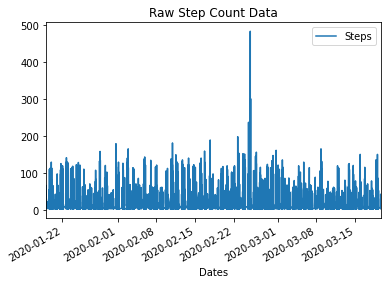

In [12]:
plot_me.rename(columns={"resource.effectivePeriod.start": "Dates", "resource.valueQuantity.value": "Steps"}).plot(
    x='Dates',
    y='Steps',
    kind='line',
    title = "Raw Step Count Data",
    legend = True,
    sharex =  True,
    )

### Resample by Day, Week and Month to get Daily,Weekly and Monthly Step Counts

In [13]:
cum_results_day = plot_me.resample('D',  on='resource.effectivePeriod.start').sum()
cum_results_week = plot_me.resample('W', on='resource.effectivePeriod.start').sum()
cum_results_month = plot_me.resample('M', on='resource.effectivePeriod.start').sum()

cum_results = cum_results_day.loc[~(cum_results_day==0).all(axis=1)]  # show only non-zero values
cum_results.head()

,resource.valueQuantity.value
resource.effectivePeriod.start,
2020-01-19 00:00:00+00:00,1704
2020-01-20 00:00:00+00:00,2439
2020-01-21 00:00:00+00:00,4322
2020-01-22 00:00:00+00:00,4023
2020-01-23 00:00:00+00:00,5863


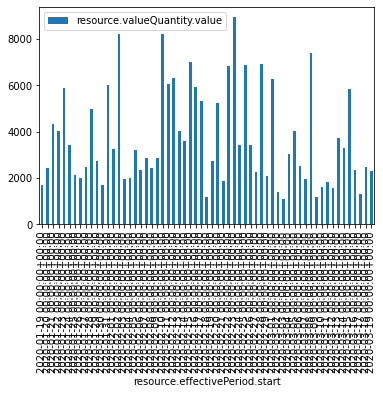

In [14]:
cum_results.plot.bar()

In [15]:
cum_results = cum_results_week.loc[~(cum_results_week==0).all(axis=1)]  # show only non-zero values
cum_results.head()

,resource.valueQuantity.value
resource.effectivePeriod.start,
2020-01-19 00:00:00+00:00,1704
2020-01-26 00:00:00+00:00,24205
2020-02-02 00:00:00+00:00,29330
2020-02-09 00:00:00+00:00,17618
2020-02-16 00:00:00+00:00,41077


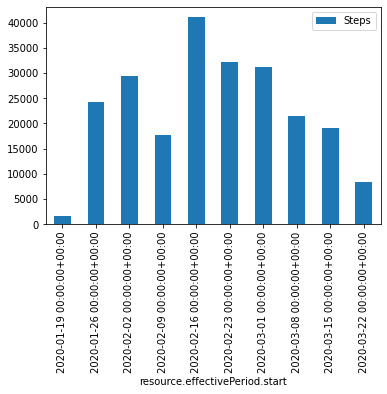

In [16]:
cum_results.rename(columns={"resource.effectivePeriod.start": "Dates", "resource.valueQuantity.value": "Steps"}).plot.bar()

In [17]:
cum_results = cum_results_month.loc[~(cum_results_month==0).all(axis=1)]  # show only non-zero values
cum_results.head()

,resource.valueQuantity.value
resource.effectivePeriod.start,
2020-01-31 00:00:00+00:00,43762
2020-02-29 00:00:00+00:00,127245
2020-03-31 00:00:00+00:00,55103


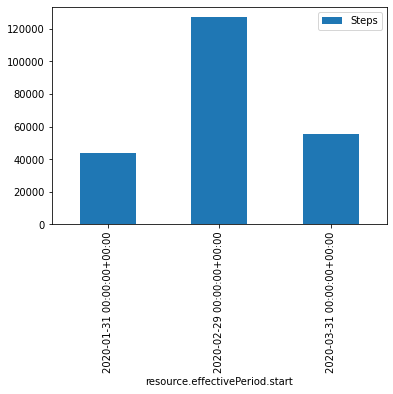

In [18]:
cum_results.rename(columns={"resource.effectivePeriod.start": "Dates", "resource.valueQuantity.value": "Steps"}).plot.bar()